## NAME:DHIVYA DHARSHINI B
## REG NO:212223240031

In [7]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load Dataset
dataset1 = pd.read_csv('/Dhata.csv')
print(dataset1.head(10))

   Input  Output
0      1      11
1      2      21
2      3      31
3      4      41
4      5      51
5      6      61
6      7      71
7      8      81
8      9      91
9     10     101


In [4]:
X = dataset1[['Input']].values
y = dataset1[['Output']].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=33
)

In [5]:
# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

Epoch [0/2000], Loss: 12980.955078
Epoch [200/2000], Loss: 11586.598633
Epoch [400/2000], Loss: 9042.536133
Epoch [600/2000], Loss: 5829.156250
Epoch [800/2000], Loss: 2823.959961
Epoch [1000/2000], Loss: 1308.030151
Epoch [1200/2000], Loss: 1017.471436
Epoch [1400/2000], Loss: 769.721375
Epoch [1600/2000], Loss: 496.339386
Epoch [1800/2000], Loss: 249.946869
Test Loss: 86.619247


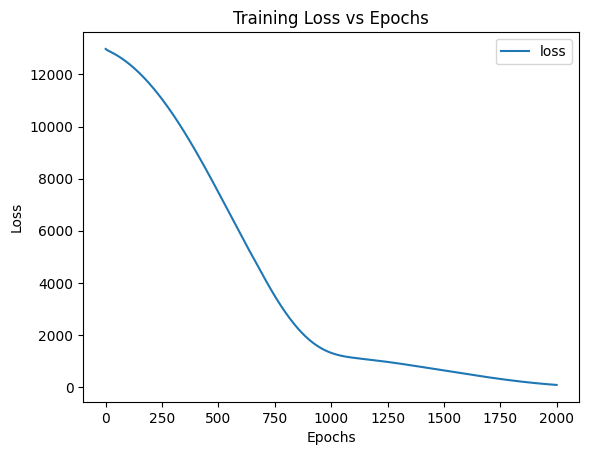

Predicted Spending Score: 95.64311218261719


In [6]:
# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize Model, Loss and Optimizer
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

# Training Function
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()
        ai_brain.history['loss'].append(loss.item())

        if epoch % 200 == 0:
            print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")

# Train the Model
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

# Test Evaluation
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f"Test Loss: {test_loss.item():.6f}")

# Plot Loss
loss_df = pd.DataFrame(ai_brain.history)
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.show()

# New Sample Prediction
X_new = torch.tensor([[9]], dtype=torch.float32)
X_new_scaled = torch.tensor(scaler.transform(X_new), dtype=torch.float32)

prediction = ai_brain(X_new_scaled).item()
print(f"Predicted Spending Score: {prediction}")